In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ckdisease/kidney_disease.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [ ]:
df = pd.read_csv('/kaggle/input/ckdisease/kidney_disease.csv')

In [ ]:
df.drop('id', axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  blood_urea  \
0    normal      notpresent  notpresent                 121.0        36.0   
1    normal      notpresent  notpresent                   NaN        18.0   
2    normal      notpresent  notpresent                 423.0        53.0   
3  abnormal         present  notpresent                 117.0        56.0   
4    normal      notpresent  notpresent                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin packed_cell_volume  \
0               1.2     NaN        NaN         15.4                 44   
1               0.8     NaN        NaN         11.3                 38   
2               1.8     NaN        NaN          9.6                 31   
3               3.8   111.0        2.5         11.2                 32   
4               1.4     NaN        NaN         11.6                 35   

  white_blood_cell_count red_blood_cell_count hypertension diabetes_mellitus  \
0                   7800                  5.2          yes               yes   
1                   6000                  NaN           no                no   
2                   7500                  NaN           no               yes   
3                   6700                  3.9          yes                no   
4                   7300                  4.6           no                no   

  coronary_artery_disease appetite peda_edema aanemia class  
0                      no     good         no      no   ckd  
1                      no     good         no      no   ckd  
2                      no     poor         no     yes   ckd  
3                      no     poor        yes     yes   ckd  
4                      no     good         no      no   ckd

In [ ]:
df.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  haemoglobin  
count  312.000000   348.000000  
mean     4.627244    12.526437  
std      3.193904     2.912587  
min      2.500000     3.100000  
25%      3.800000    10.300000  
50%      4.400000    12.650000  
75%      4.900000    15.000000  
max     47.000000    17.800000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [ ]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [ ]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [ ]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [ ]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has [0 1] values



In [ ]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [ ]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [ ]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [ ]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [ ]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [ ]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [ ]:
# Assuming 'categorical_cols' contains the names of your categorical columns
df.dropna(subset=cat_cols, inplace=True)

In [ ]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

All the missing values are handeled now, lets do ctaegorical features encding now

### Feature Encoding

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



As all of the categorical columns have 2 categories we can use label encoder

In [ ]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0          normal   
1   7.0            50.0             1.020      4.0    0.0          normal   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  blood_urea  \
0    normal      notpresent  notpresent                 121.0        36.0   
1    normal      notpresent  notpresent                  99.0        18.0   
2    normal      notpresent  notpresent                 423.0        53.0   
3  abnormal         present  notpresent                 117.0        56.0   
4    normal      notpresent  notpresent                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  \
0               1.2   130.0        4.2         15.4                44.0   
1               0.8   138.0        5.0         11.3                38.0   
2               1.8   133.0        3.9          9.6                31.0   
3               3.8   111.0        2.5         11.2                32.0   
4               1.4   138.0        3.4         11.6                35.0   

   white_blood_cell_count  red_blood_cell_count hypertension  \
0                  7800.0                   5.2          yes   
1                  6000.0                   5.0           no   
2                  7500.0                   5.8           no   
3                  6700.0                   3.9          yes   
4                  7300.0                   4.6           no   

  diabetes_mellitus coronary_artery_disease appetite peda_edema aanemia  class  
0               yes                      no     good         no      no      0  
1                no                      no     good         no      no      0  
2               yes                      no     poor         no     yes      0  
3                no                      no     poor        yes     yes      0  
4                no                      no     good         no      no      0

#  **Eploratory Data Analysis** 

### 1. Histogram for Numerical Distributions

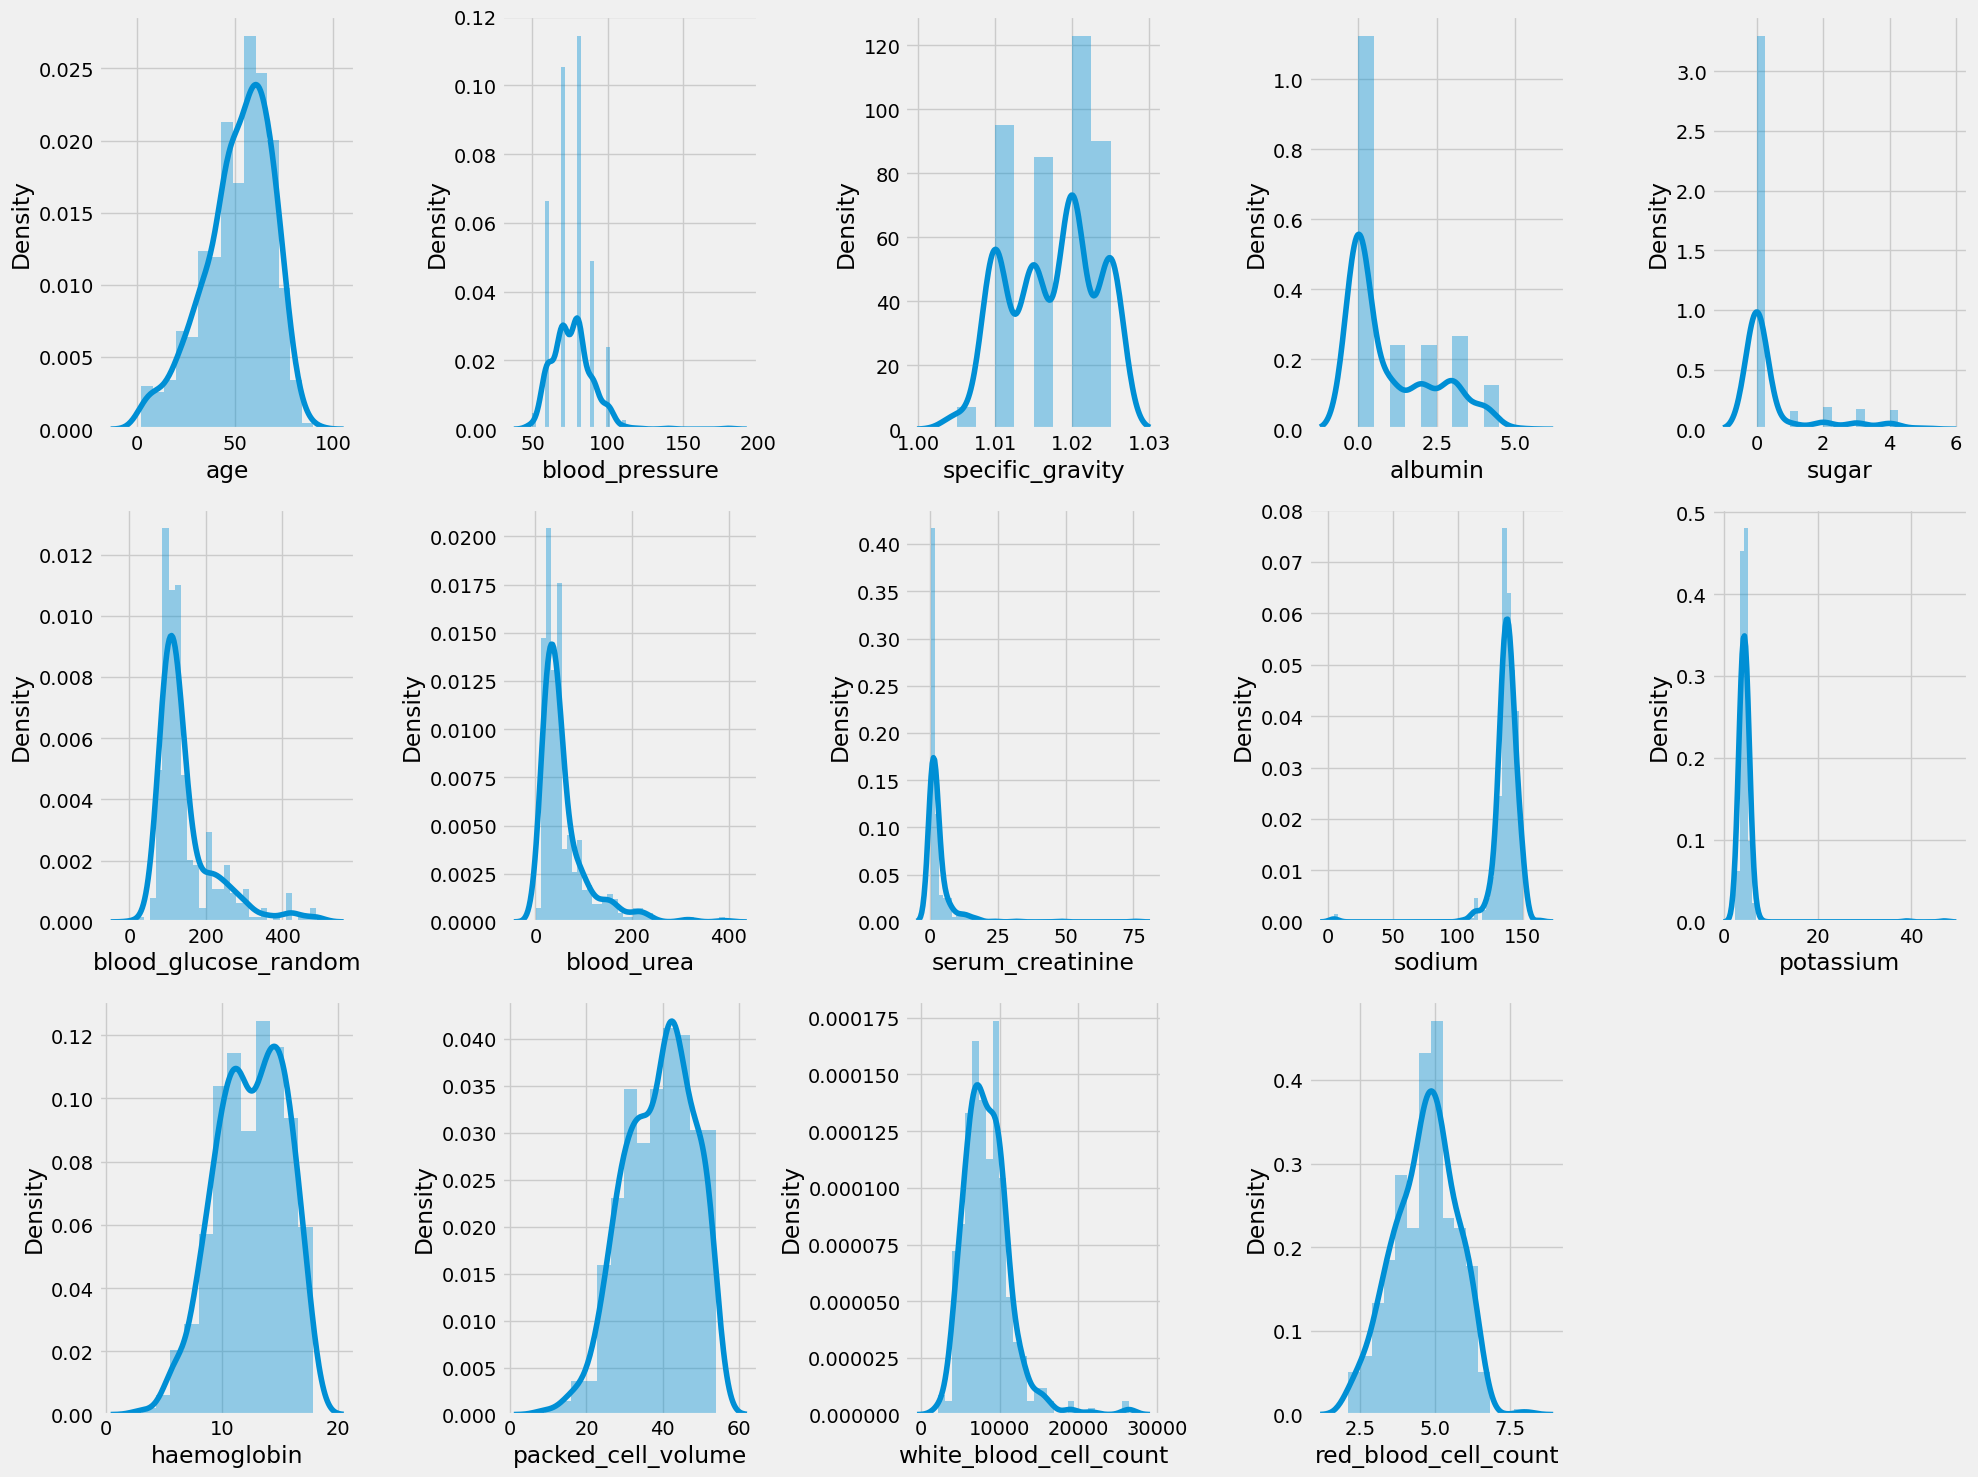

In [ ]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()


### 2 Count Plots for Categorical Features

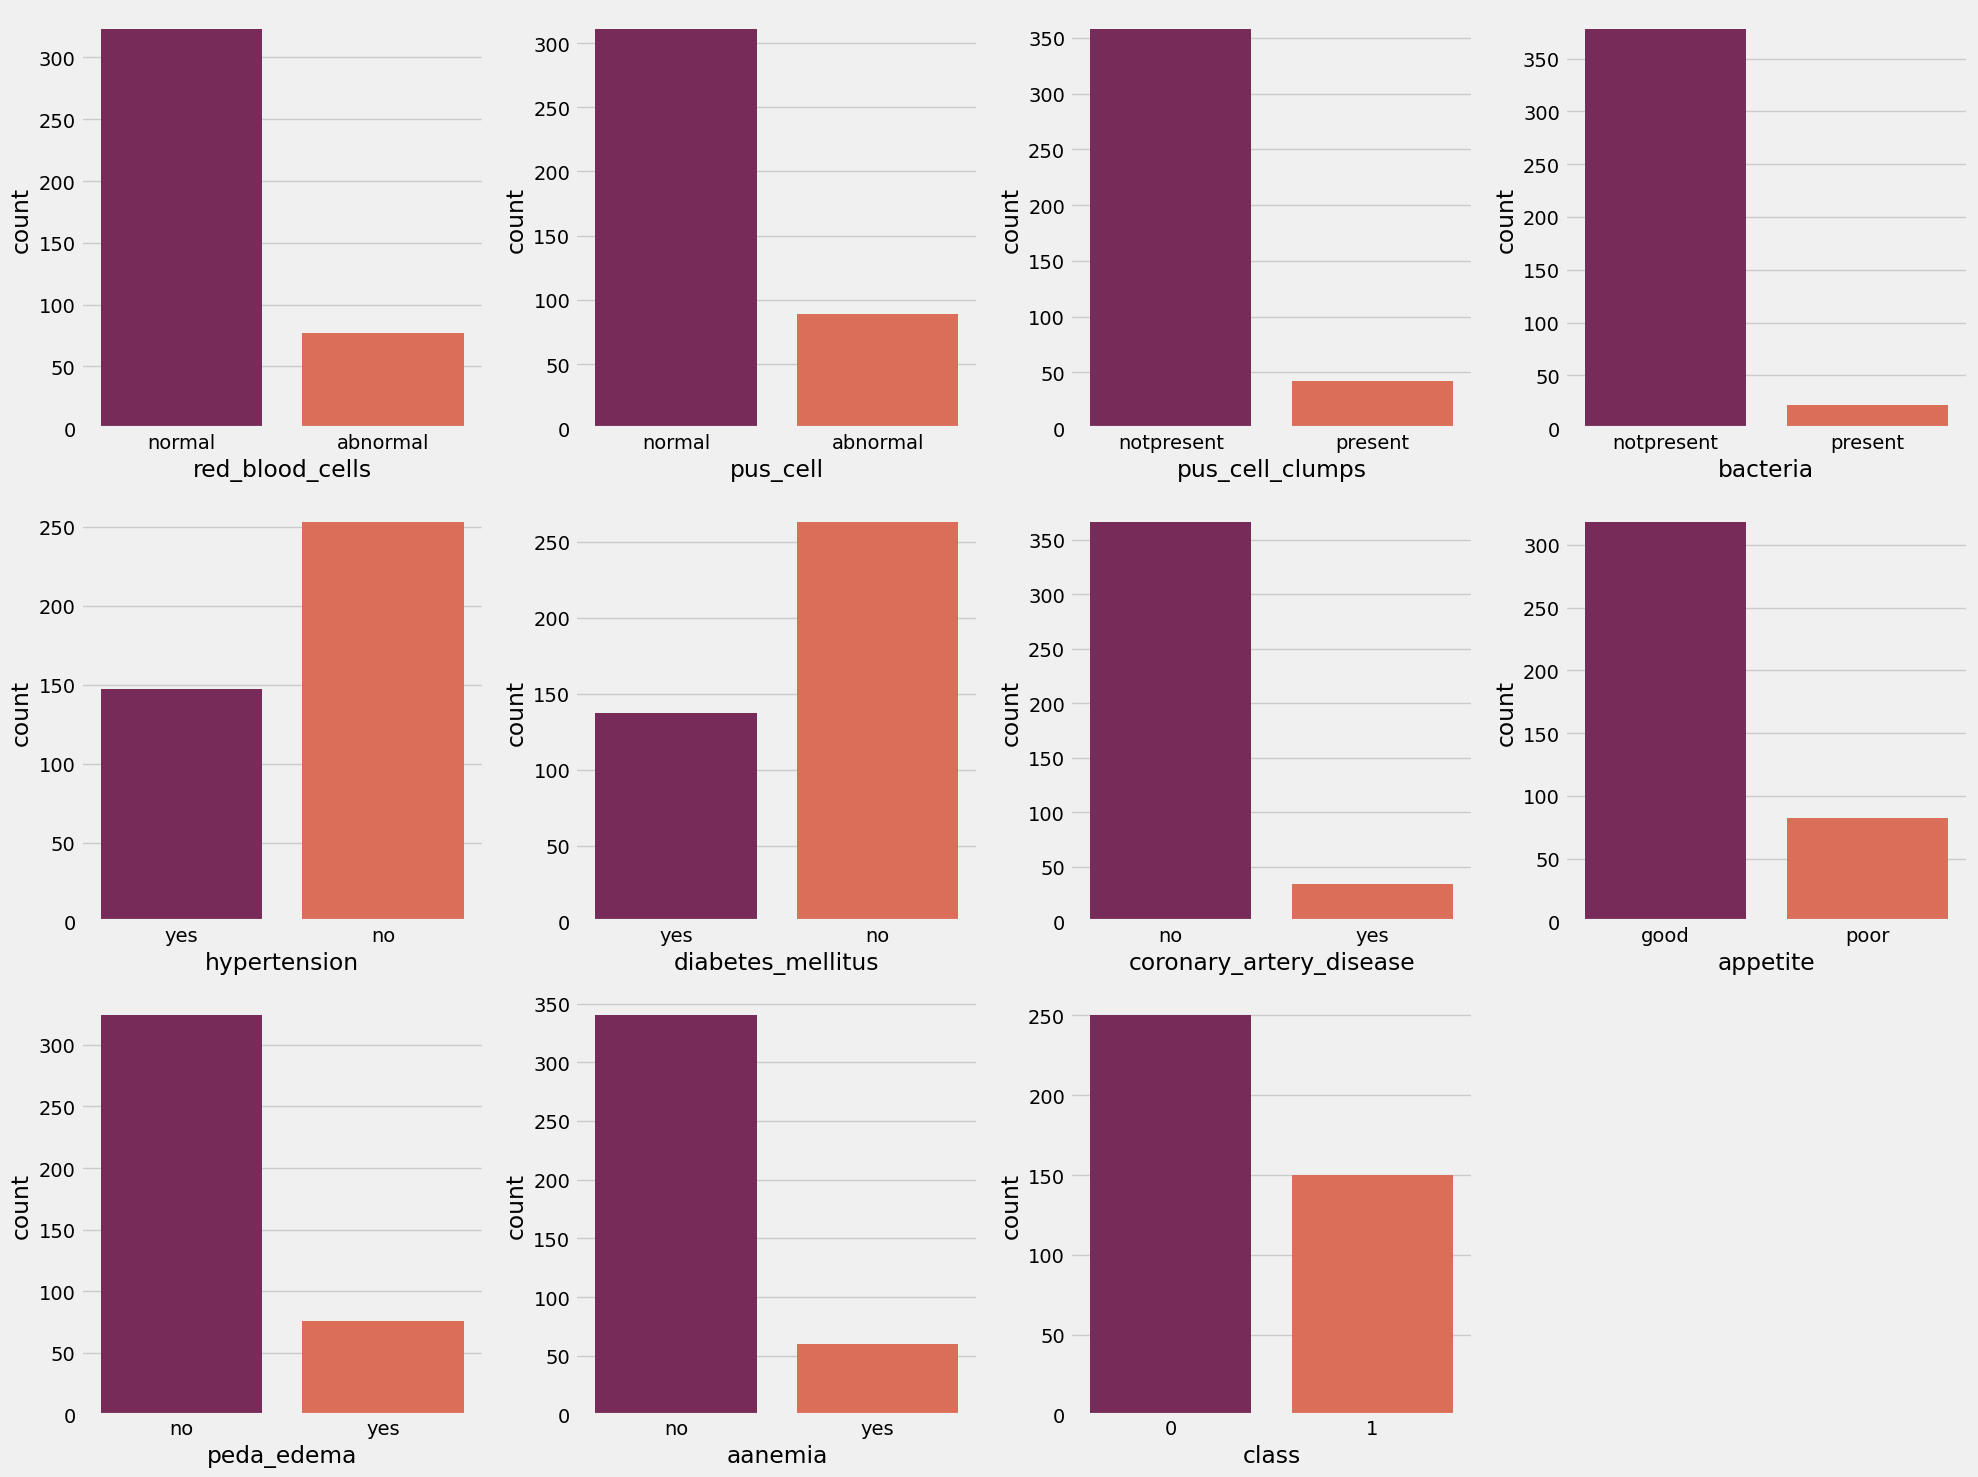

In [ ]:
 #looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x=df[column], palette='rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()


### 3. Boxplots to See Outliers & Class-wise Distribution

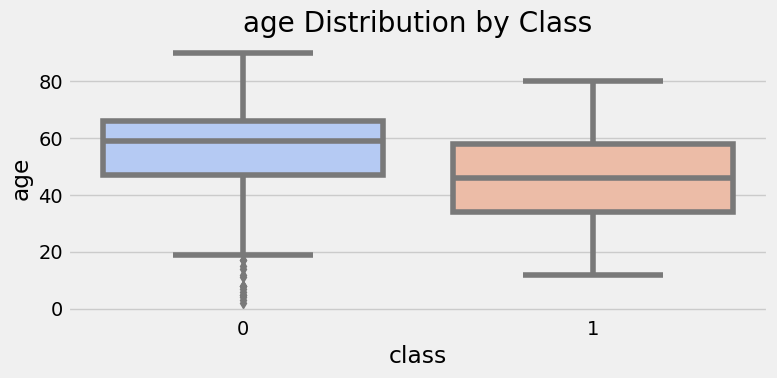

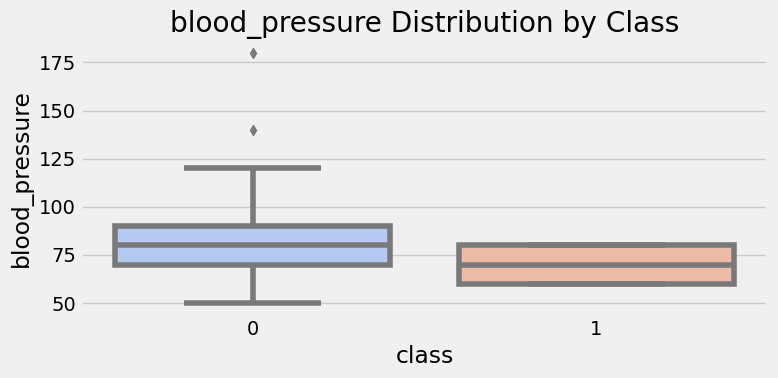

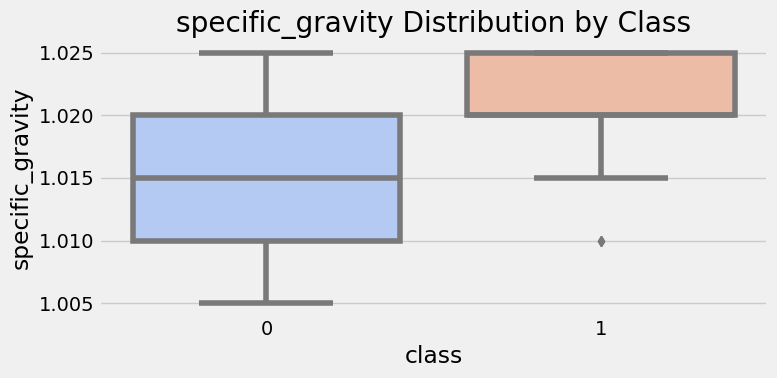

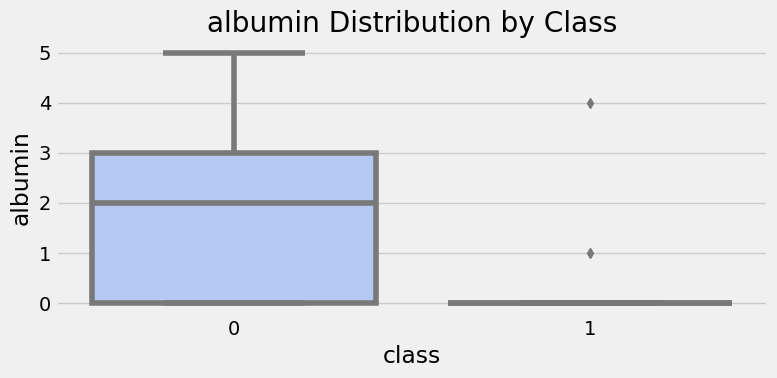

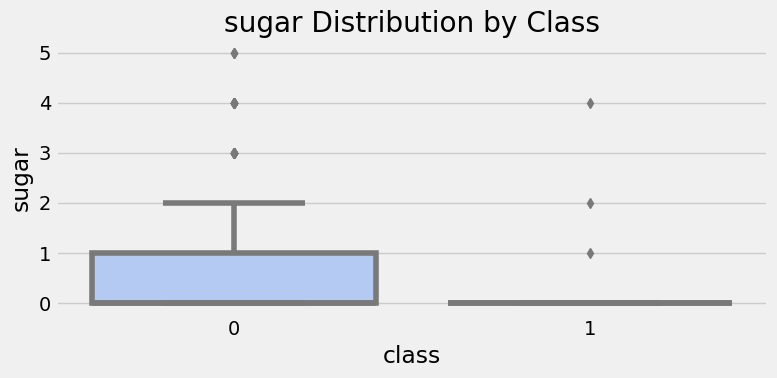

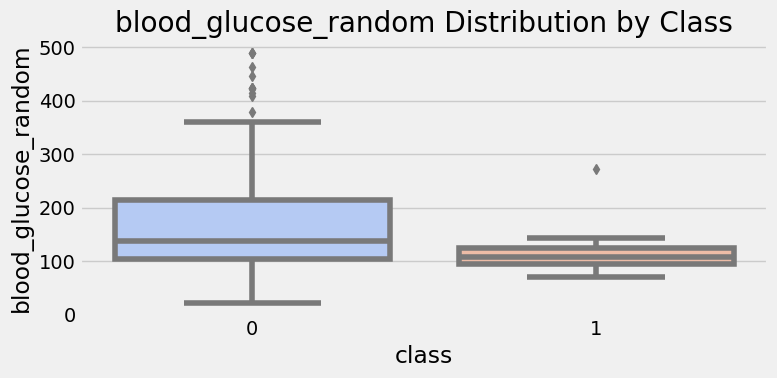

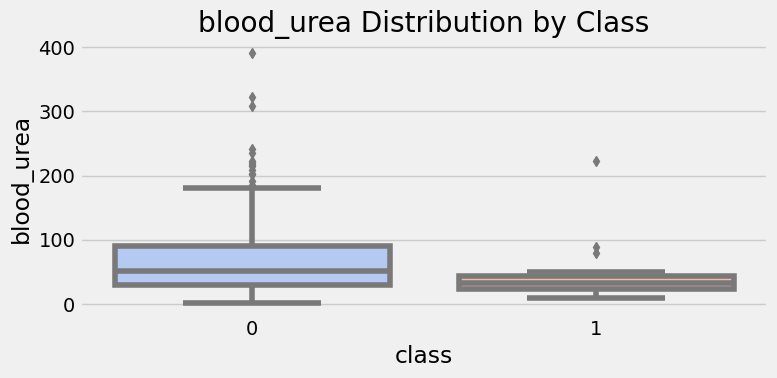

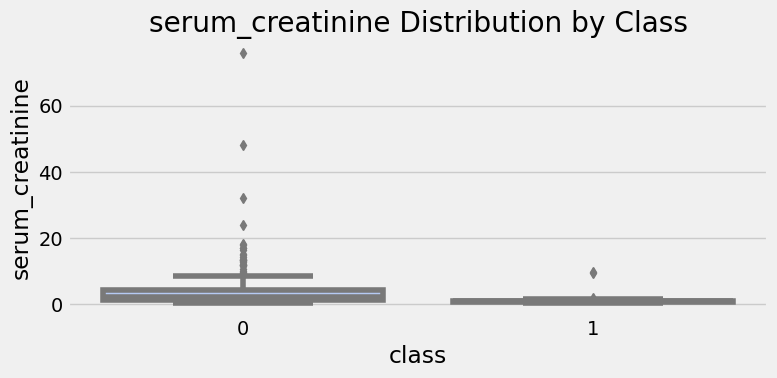

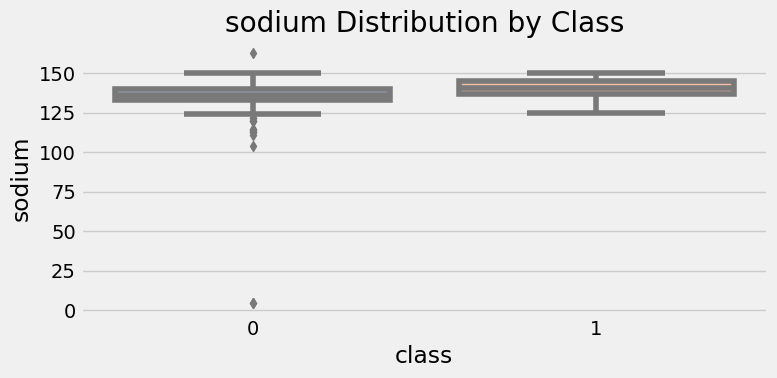

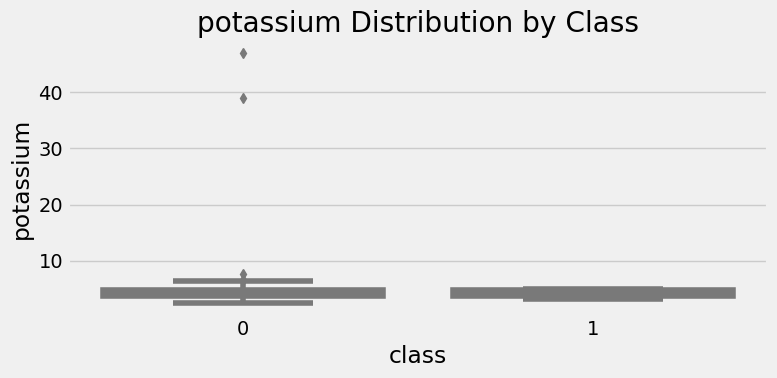

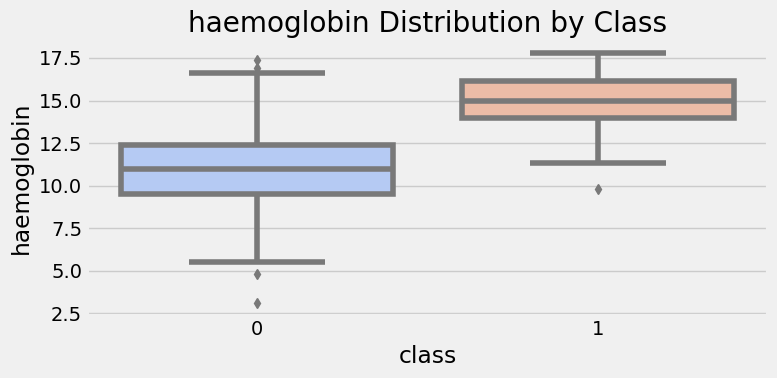

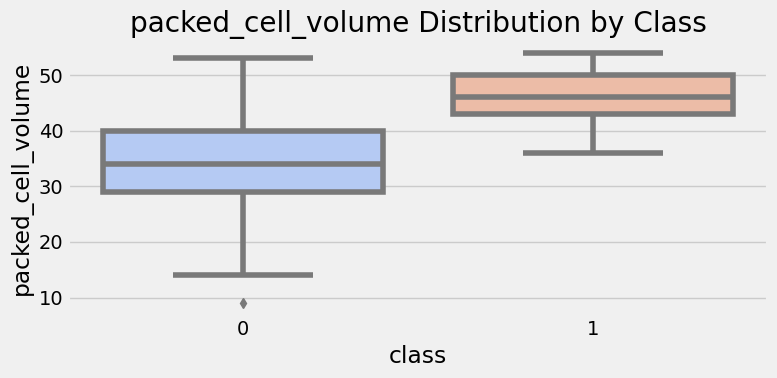

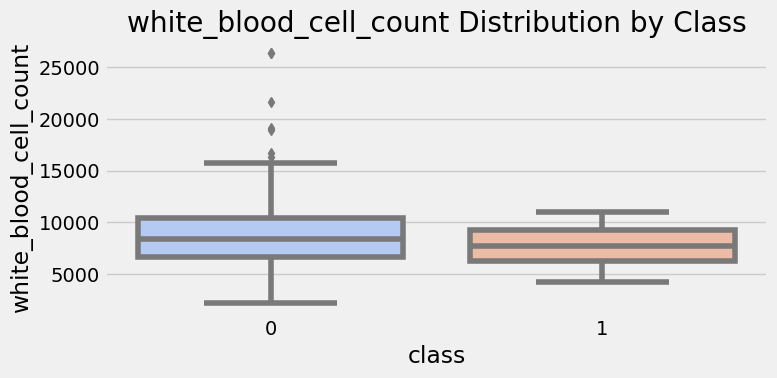

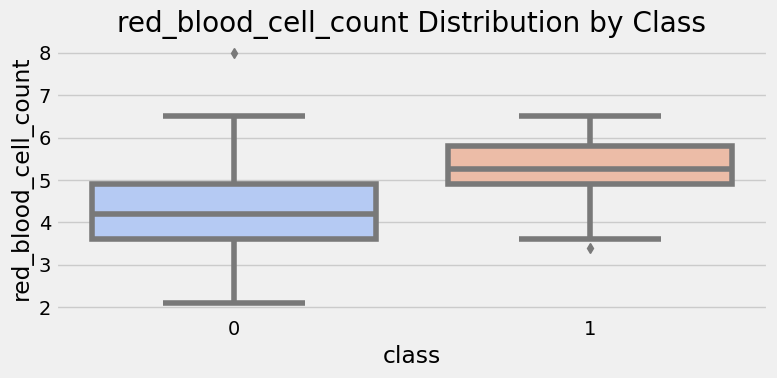

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='class', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} Distribution by Class')
    plt.tight_layout()
    plt.show()


### 3 Correlation Heatmap

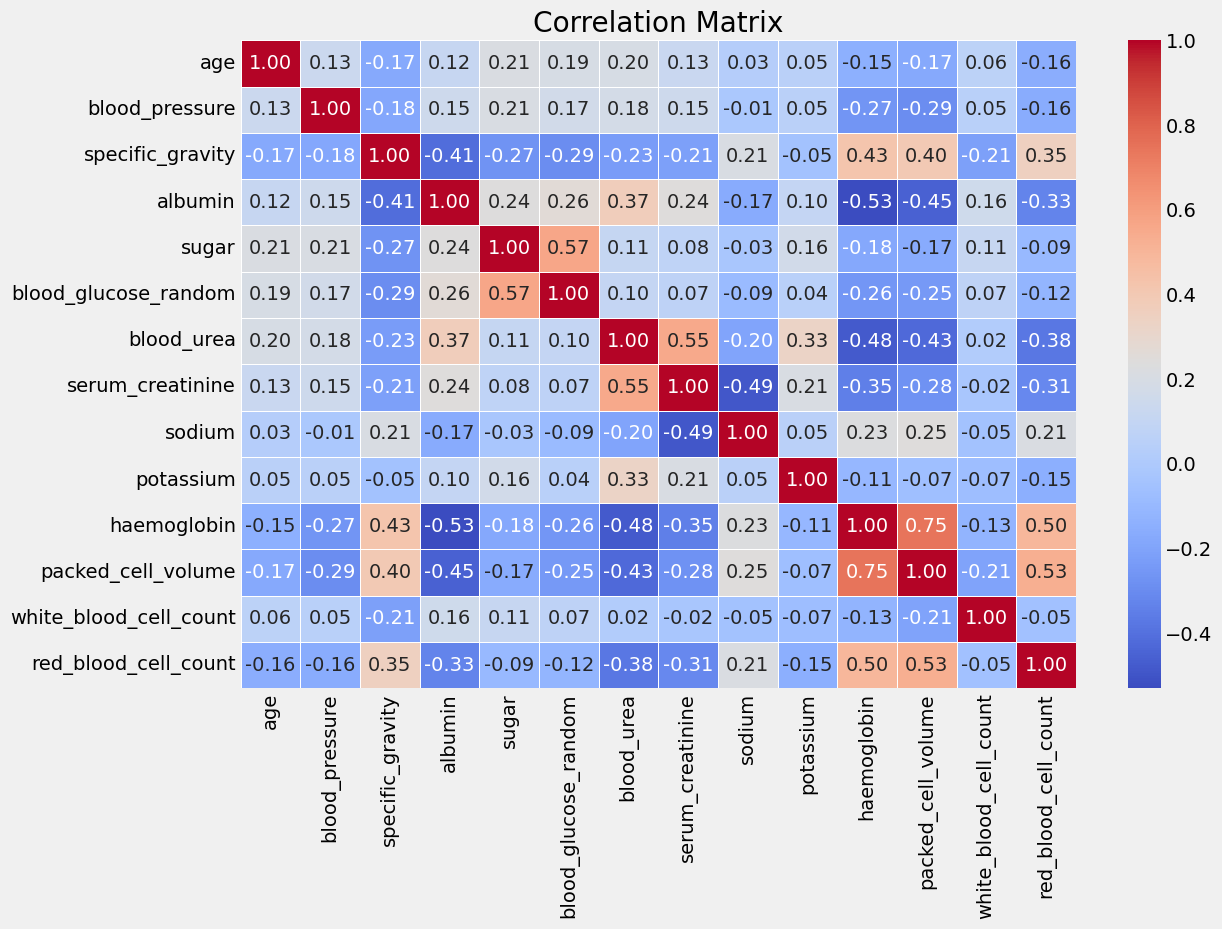

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### 5 Pairplot to Explore Multivariate Relationships

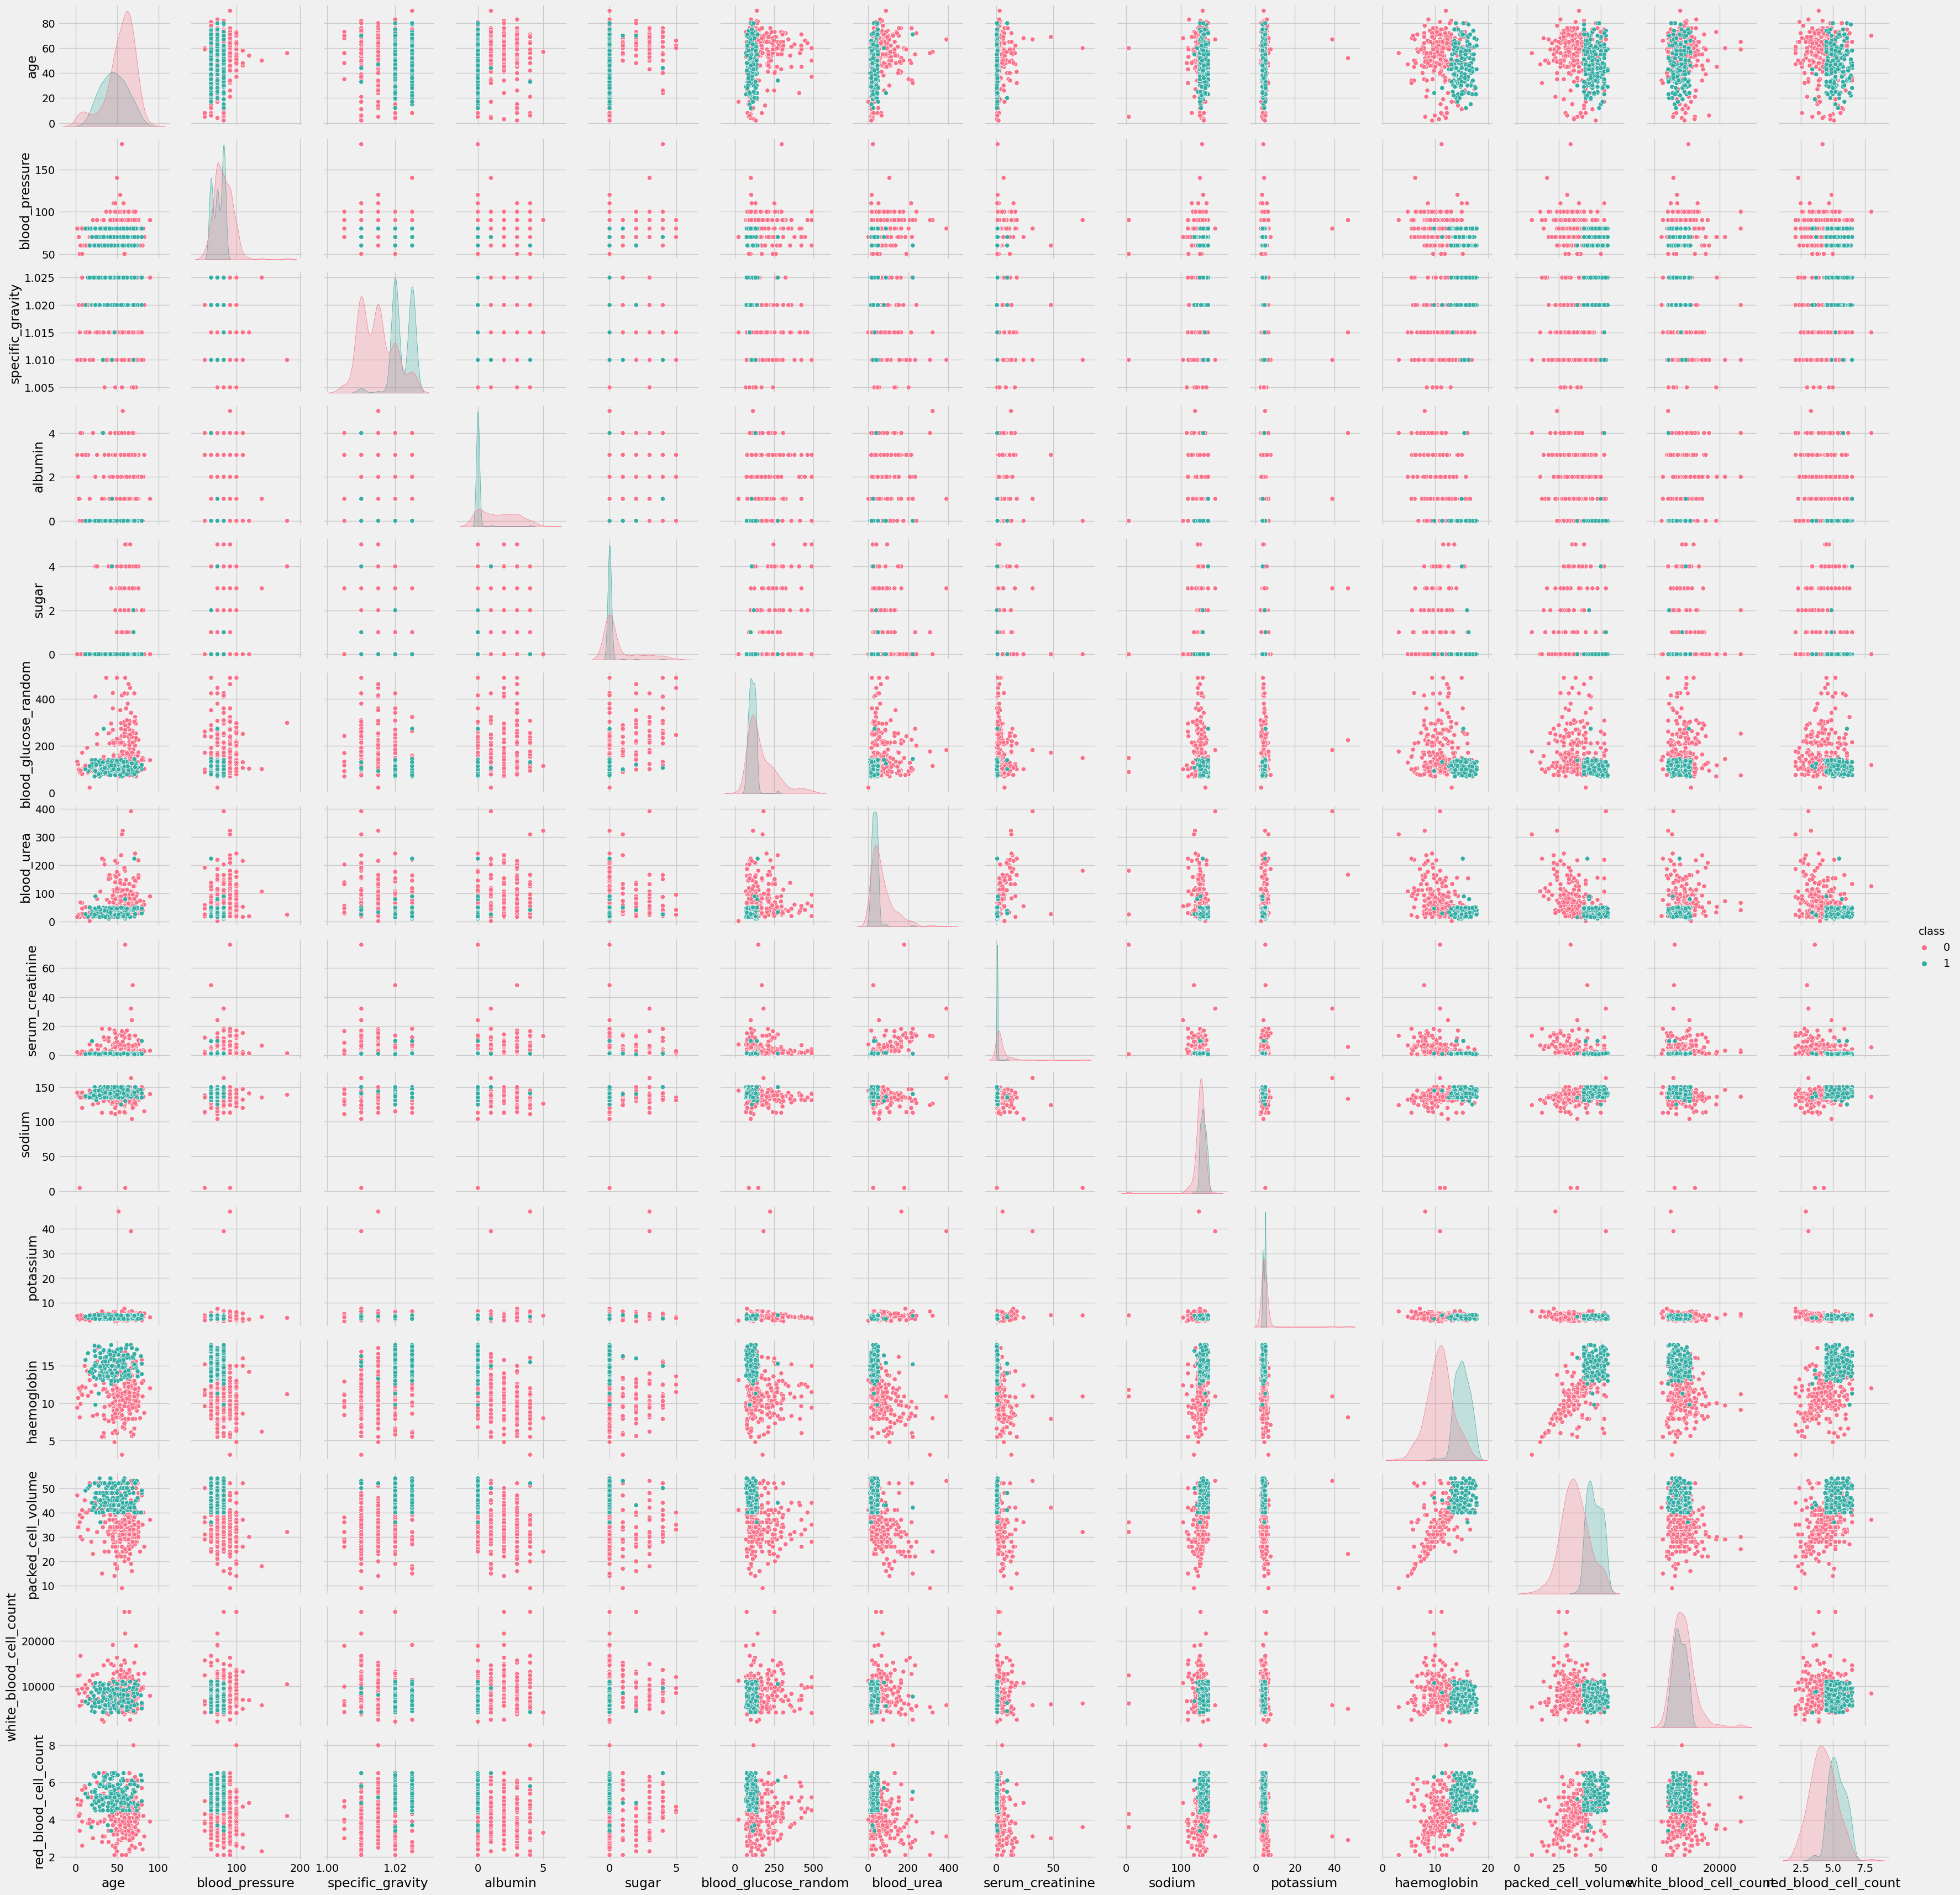

In [ ]:
sns.pairplot(df[num_cols + ['class']], hue='class', palette='husl')
plt.show()


In [ ]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0          normal   
1   7.0            50.0             1.020      4.0    0.0          normal   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  blood_urea  \
0    normal      notpresent  notpresent                 121.0        36.0   
1    normal      notpresent  notpresent                  99.0        18.0   
2    normal      notpresent  notpresent                 423.0        53.0   
3  abnormal         present  notpresent                 117.0        56.0   
4    normal      notpresent  notpresent                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  \
0               1.2   130.0        4.2         15.4                44.0   
1               0.8   138.0        5.0         11.3                38.0   
2               1.8   133.0        3.9          9.6                31.0   
3               3.8   111.0        2.5         11.2                32.0   
4               1.4   138.0        3.4         11.6                35.0   

   white_blood_cell_count  red_blood_cell_count hypertension  \
0                  7800.0                   5.2          yes   
1                  6000.0                   5.0           no   
2                  7500.0                   5.8           no   
3                  6700.0                   3.9          yes   
4                  7300.0                   4.6           no   

  diabetes_mellitus coronary_artery_disease appetite peda_edema aanemia  class  
0               yes                      no     good         no      no      0  
1                no                      no     good         no      no      0  
2               yes                      no     poor         no     yes      0  
3                no                      no     poor        yes     yes      0  
4                no                      no     good         no      no      0

# **Supervised Model Development**

## 1. **XGBoost Novel Model**

## ✅ Step 2: Create Custom Features (Feature Engineering)
We’ll add domain-inspired new features to enhance model performance:

### 🔧 Feature Additions:

1. **Clinical Severity Index (CSI)** – Combines critical indicators:

In [ ]:
df['CSI'] = (
    df['serum_creatinine'] * 0.4 +
    df['blood_urea'] * 0.3 +
    (15 - df['haemoglobin']) * 0.2 +  # Normal Hb ~15
    (3.5 - df['albumin']) * 0.1       # Normal albumin ~3.5
)


2. **Anemia Risk Score** – Indicates possible anemia:


In [ ]:
df['Anemia_Risk'] = (
    (13 - df['haemoglobin']) +
    (4.5 - df['red_blood_cell_count']) +
    (45 - df['packed_cell_volume']) +
    df['aanemia'].map({'yes': 1, 'no': 0})
)


3. **Interaction Features** – Capture relationships:

In [ ]:
df['Glucose_Diabetes'] = df['blood_glucose_random'] * df['diabetes_mellitus'].map({'yes': 1, 'no': 0})
df['Pressure_Hypertension'] = df['blood_pressure'] * df['hypertension'].map({'yes': 1, 'no': 0})


## ✅ Step 2: Train XGBoost with SHAP-Aware Feature Selection
### 🔁 Model Pipeline:
1. **Train initial XGBoost classifier.**

2. **Extract SHAP values** and sort features by importance.

3. **Retrain the model** using only top N features from SHAP

In [ ]:
# Convert categorical columns to 'category' dtype
categorical_columns = [
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
    'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
    'appetite', 'peda_edema', 'aanemia'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import shap
import pandas as pd

# Split features and target
X = df.drop('class', axis=1)
y = df['class']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Initial model with categorical support
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
model.fit(X_train, y_train)

# SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# Mean absolute SHAP value per feature
shap_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': shap_values.abs.mean(0).values
}).sort_values(by='importance', ascending=False)

# Select top N features
top_features = shap_df['feature'].head(15).tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Retrain model with top features
final_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
final_model.fit(X_train_top, y_train)

# Evaluate
accuracy = final_model.score(X_test_top, y_test)
print("Top Feature Model Accuracy:", accuracy)


Top Feature Model Accuracy: 1.0


## XGBoost Model Evaluation

1. **Classification Report**

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = final_model.predict(X_test_top)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        37

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



2. **Confusion Matrix**

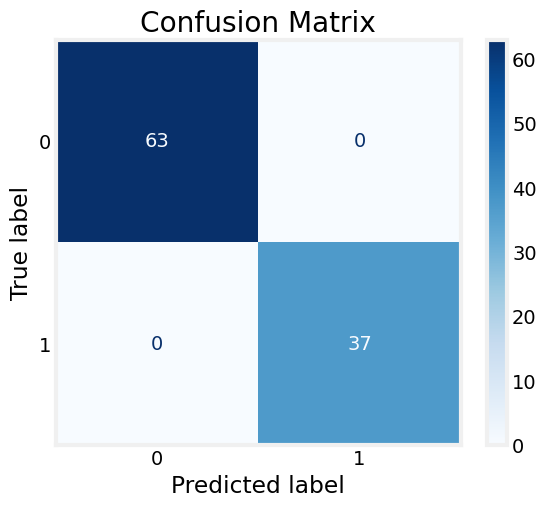

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = final_model.predict(X_test_top)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


3. **Roc Curver**

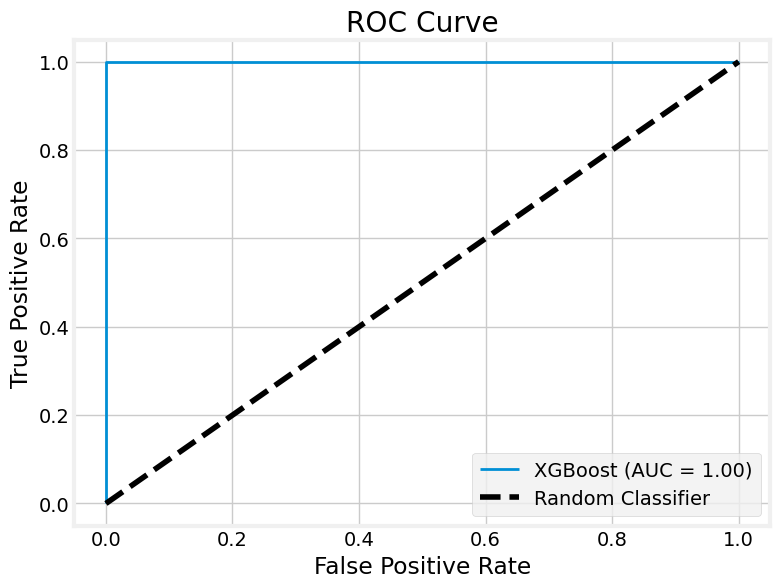

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_proba = final_model.predict_proba(X_test_top)[:, 1]  # Class 1 = Positive class

# ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Plot
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

ax.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})', linewidth=2)
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

ax.set_title("ROC Curve")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")
ax.grid(True)
plt.show()


## 2. CatBoost Novel Model 

### ✅ Key Contributions:
1. Ordinal encoding of categorical variables before polynomial transformation.

2. Polynomial interaction features (2-way only).

3. CatBoostClassifier with Optuna hyperparameter tuning.

4. SHAP-based feature selection.

5. Model retraining using top features.



In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Encode categorical features
encoder = ColumnTransformer([
    ("cat", OrdinalEncoder(), categorical_cols)
], remainder='passthrough')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Feature interaction (2-way)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_train_encoded)
X_poly_test = poly.transform(X_test_encoded)
poly_features = poly.get_feature_names_out(numerical_cols + categorical_cols)

X_poly_df = pd.DataFrame(X_poly, columns=poly_features)
X_poly_test_df = pd.DataFrame(X_poly_test, columns=poly_features)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
import shap
from catboost import CatBoostClassifier
import optuna

# 1. Split features and target
X = df.drop('class', axis=1)
y = df['class']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 3. Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 4. Ordinal encoding of categorical variables
encoder = ColumnTransformer([
    ("cat", OrdinalEncoder(), categorical_cols)
], remainder='passthrough')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# 5. Polynomial feature interactions (2-way only)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_train_encoded)
X_poly_test = poly.transform(X_test_encoded)

feature_names = poly.get_feature_names_out(numerical_cols + categorical_cols)
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
X_poly_test_df = pd.DataFrame(X_poly_test, columns=feature_names)

# 6. Optuna tuning for CatBoost
def objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0),
        'iterations': trial.suggest_int('iterations', 100, 500),
        'random_seed': 42,
        'verbose': 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_poly_df, y_train)
    return model.score(X_poly_test_df, y_test)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
print("Best params:", study.best_params)

# 7. Train final model with best parameters
best_params = study.best_params
best_params.update({'random_seed': 42, 'verbose': 0})

final_model = CatBoostClassifier(**best_params)
final_model.fit(X_poly_df, y_train)

# 8. SHAP values for feature importance
explainer = shap.Explainer(final_model)
shap_values = explainer(X_poly_df)

# 9. SHAP mean importance
shap_df = pd.DataFrame({
    'feature': X_poly_df.columns,
    'importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='importance', ascending=False)

# 10. Select top 20 features
top_features = shap_df['feature'].head(20).tolist()
X_train_top = X_poly_df[top_features]
X_test_top = X_poly_test_df[top_features]

# 11. Retrain on top features
final_model_top = CatBoostClassifier(**best_params)
final_model_top.fit(X_train_top, y_train)

# 12. Evaluate
accuracy = final_model_top.score(X_test_top, y_test)
print("Final Model Accuracy (Top Features):", accuracy)


[I 2025-05-08 14:51:57,279] A new study created in memory with name: no-name-8b8c440e-8da7-4f4a-932b-59a68f029be1
[I 2025-05-08 14:52:27,067] Trial 0 finished with value: 1.0 and parameters: {'depth': 7, 'learning_rate': 0.23033102342247647, 'l2_leaf_reg': 0.9531527667567945, 'iterations': 458}. Best is trial 0 with value: 1.0.
[I 2025-05-08 14:52:49,757] Trial 1 finished with value: 1.0 and parameters: {'depth': 7, 'learning_rate': 0.16943026381074539, 'l2_leaf_reg': 6.3593815347325835, 'iterations': 355}. Best is trial 0 with value: 1.0.
[I 2025-05-08 14:52:57,764] Trial 2 finished with value: 1.0 and parameters: {'depth': 6, 'learning_rate': 0.1089212800762588, 'l2_leaf_reg': 8.493205699870426, 'iterations': 203}. Best is trial 0 with value: 1.0.
[I 2025-05-08 14:53:46,335] Trial 3 finished with value: 0.99 and parameters: {'depth': 9, 'learning_rate': 0.2671558181397323, 'l2_leaf_reg': 8.019223753452215, 'iterations': 217}. Best is trial 0 with value: 1.0.
[I 2025-05-08 14:53:48,57

Best params: {'depth': 7, 'learning_rate': 0.23033102342247647, 'l2_leaf_reg': 0.9531527667567945, 'iterations': 458}
Final Model Accuracy (Top Features): 0.98


### 3 CatBoost Evaluation

### ✅ Key Contributions:
1. Ordinal encoding of categorical variables before polynomial transformation.

2. Polynomial interaction features (2-way only).

3. CatBoostClassifier with Optuna hyperparameter tuning.

4. SHAP-based feature selection.

5. Model retraining using top features.

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.97      0.97      0.97        37

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



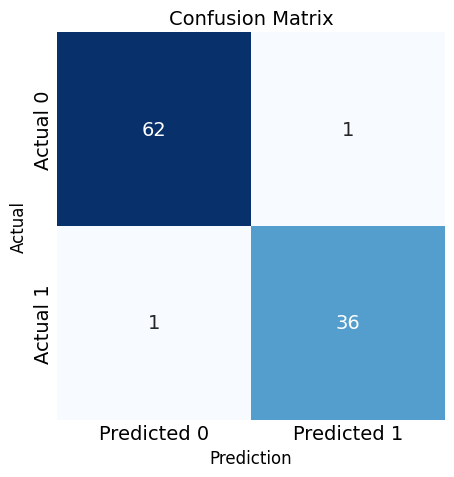

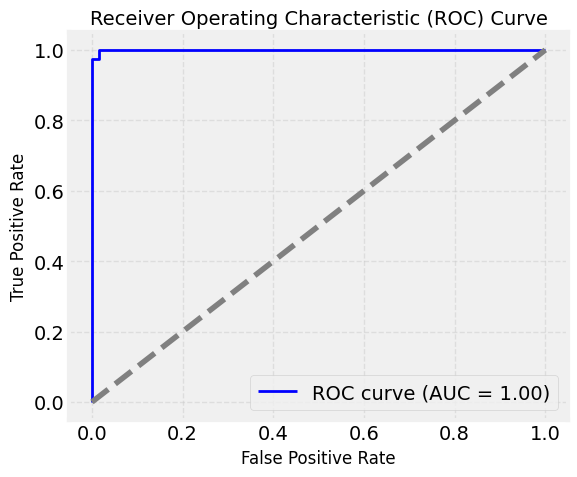

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict test set
y_pred = final_model_top.predict(X_test_top)
y_proba = final_model_top.predict_proba(X_test_top)[:, 1]  # For ROC

# 1. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5), facecolor='white')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

# 3. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5), facecolor='white')
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 4. Random Forest Classifier Novel model

# ✅ Four Novel Contributions:
1. Feature Engineering with Mutual Information: Instead of SHAP, we'll select features based on mutual information with the target.

2. SMOTE Oversampling: To balance the minority class using SMOTE for better recall.

3. Recursive Feature Elimination with Cross-Validation (RFECV): To select the most optimal subset of features.

4. Model Explainability with Permutation Importance: Instead of SHAP, we’ll use permutation importance for insights.

Top Permutation Importance Features:
Anemia_Risk: 0.0250
haemoglobin: 0.0070
packed_cell_volume: 0.0000
serum_creatinine: 0.0000
specific_gravity: 0.1370
diabetes_mellitus_no: 0.0000
albumin: 0.0070
hypertension_no: 0.0000
Pressure_Hypertension: 0.0000
hypertension_yes: 0.0000
red_blood_cell_count: 0.0010
Glucose_Diabetes: 0.0000
blood_glucose_random: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        37

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



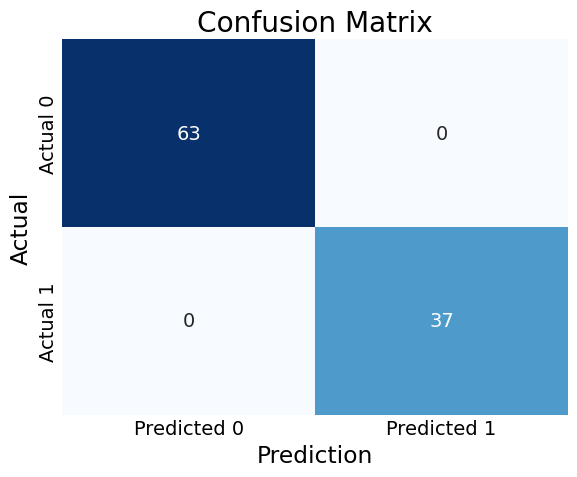

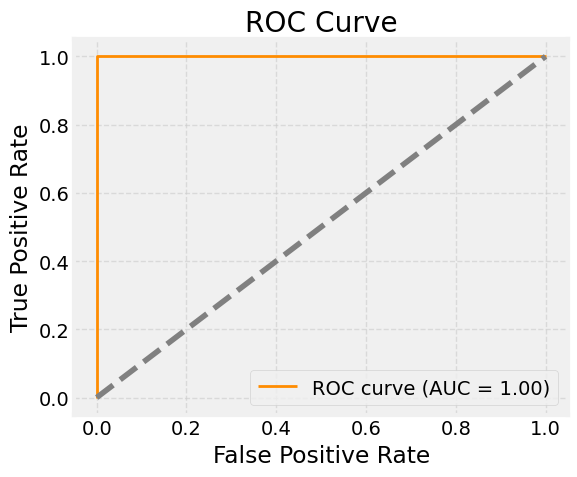

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif, RFECV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Split features and target
X = df.drop('class', axis=1)
y = df['class']

# Encode categorical if needed
X = pd.get_dummies(X)

# 1. Mutual Information for Top Features
mi_scores = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Select top 20
top_features = mi_df['Feature'].head(20).tolist()
X = X[top_features]

# 2. SMOTE to balance the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Recursive Feature Elimination with CV
base_rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfecv = RFECV(base_rf, step=1, cv=5, scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train_resampled, y_train_resampled)

# Reduce to optimal features
X_train_final = rfecv.transform(X_train_resampled)
X_test_final = rfecv.transform(X_test)

# 4. Train Final Model
final_rf = RandomForestClassifier(n_estimators=100, random_state=42)
final_rf.fit(X_train_final, y_train_resampled)
y_pred = final_rf.predict(X_test_final)
y_proba = final_rf.predict_proba(X_test_final)[:, 1]

# 5. Permutation Importance
result = permutation_importance(final_rf, X_test_final, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importances = result.importances_mean

# Print top important features
print("Top Permutation Importance Features:")
for f, i in zip(np.array(top_features)[rfecv.get_support()], importances):
    print(f"{f}: {i:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5), facecolor='white')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5), facecolor='white')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




## 5. LightGBM Classifier Novel Model

### ✅ Five New Novel Contributions for LightGBM:
1. Target Encoding: Instead of one-hot encoding, we’ll apply target encoding to categorical variables for preserving information.

2. Model Calibration (Platt Scaling): We'll calibrate predicted probabilities using CalibratedClassifierCV to improve reliability of probability outputs.

3. Custom Evaluation Metric (F1-Score): Instead of using just built-in metrics, we’ll define and use a custom F1 scorer for tuning.

4. Hyperparameter Tuning via Bayesian Optimization: We'll use BayesSearchCV for more efficient tuning than GridSearch.


[LightGBM] [Info] Number of positive: 120, number of negative: 200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375000 -> initscore=-0.510826
[LightGBM] [Info] Start training from score -0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

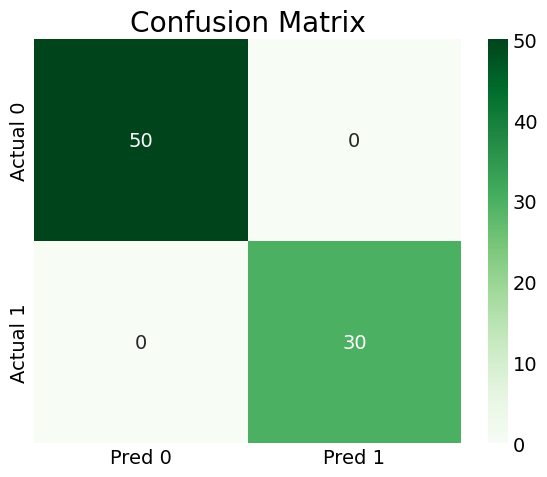

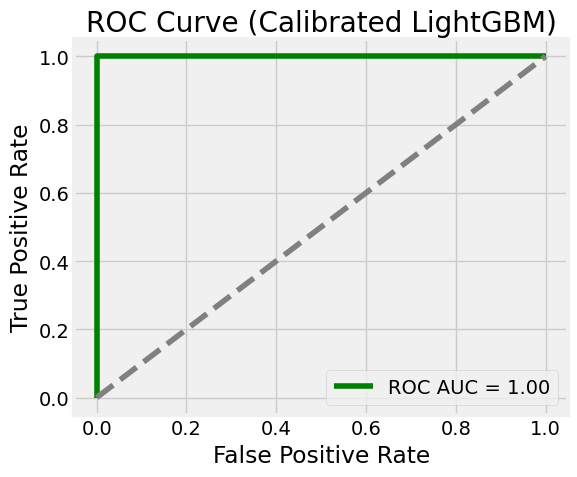

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc, make_scorer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Target and features
X = df.drop('class', axis=1)
y = df['class']

# 1. Target Encoding
encoder = TargetEncoder()
X_encoded = encoder.fit_transform(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, stratify=y, test_size=0.2, random_state=42)

# 2. Define LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# 3. Define Custom F1 Scorer
f1 = make_scorer(f1_score, average='weighted')

# 4. Bayesian Hyperparameter Tuning
search_space = {
    'num_leaves': Integer(10, 50),
    'max_depth': Integer(3, 12),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'n_estimators': Integer(100, 500),
    'min_child_samples': Integer(10, 100),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0)
}

opt = BayesSearchCV(
    lgb_model,
    search_spaces=search_space,
    cv=3,
    scoring=f1,
    n_iter=25,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

opt.fit(X_train, y_train)
best_lgb = opt.best_estimator_
print("Best Params:", opt.best_params_)

# 5. Model Calibration (Platt Scaling)
calibrated_lgb = CalibratedClassifierCV(best_lgb, method='sigmoid', cv=3)
calibrated_lgb.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = calibrated_lgb.predict(X_test)
y_proba = calibrated_lgb.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5), facecolor='white')
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5), facecolor='white')
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}", color='green')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Calibrated LightGBM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# SHAP for Feature Importance
#explainer = shap.Explainer(calibrated_lgb.base_estimator_, X_train)
#shap_values = explainer(X_test)

#plt.figure(facecolor='white')
#shap.summary_plot(shap_values, X_test, show=True)


# Unsupervised Learning 

## 1. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

### ✅ 5 Novel Contributions for Unsupervised DBSCAN Model:
1. Advanced Feature Reduction with t-SNE (for visualization) – Helps in reducing data dimensionality to 2D while preserving complex patterns.

2. Optimal ε (eps) Estimation Using k-Distance Graph – Visual method to choose the best eps value based on data density.

3. Silhouette Score Analysis – Although unsupervised, we’ll assess clustering quality quantitatively.

4. Noise/Outlier Detection Visualization – Explicitly identify and visualize noise points.

5. Cluster Label Interpretation via Class Distribution – Compare unsupervised clusters with actual labels (if available) to understand structure.

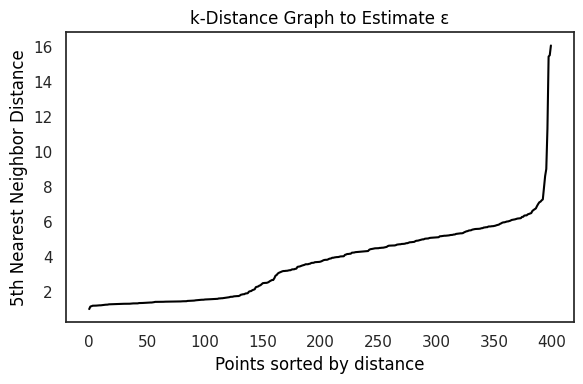

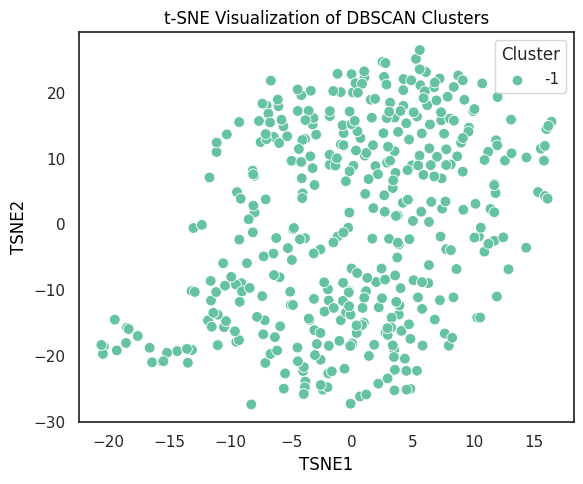

Not enough core clusters for silhouette score.


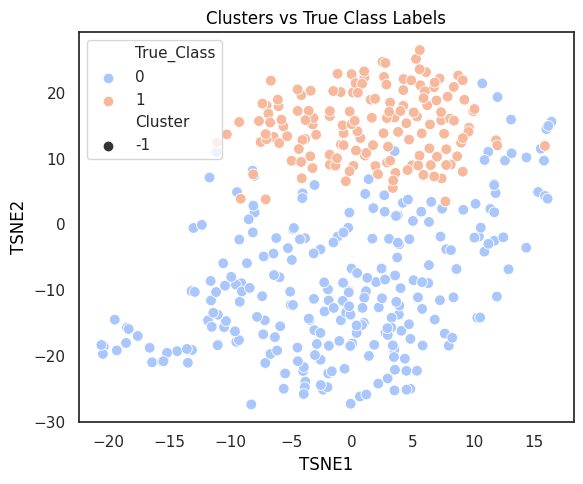


Class Distribution per Cluster:
Cluster      -1
True_Class     
0           250
1           150


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 0. Seaborn style for white axes background
sns.set_style("white")
sns.set_context("notebook")

# 1. Prepare data
X = df.drop('class', axis=1) if 'class' in df.columns else df.copy()
X = pd.get_dummies(X, drop_first=True)
X_scaled = StandardScaler().fit_transform(X)

# 2. k-distance plot for eps estimation
neighbors = NearestNeighbors(n_neighbors=5).fit(X_scaled)
distances, _ = neighbors.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])

plt.figure(figsize=(6, 4), facecolor='white')
plt.plot(distances, color='black')
plt.xlabel("Points sorted by distance", color='black')
plt.ylabel("5th Nearest Neighbor Distance", color='black')
plt.title("k-Distance Graph to Estimate ε", color='black')
plt.grid(False)
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()

# 3. DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 4. t-SNE visualization of clusters
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

plt.figure(figsize=(6, 5), facecolor='white')
ax = sns.scatterplot(
    x=X_tsne[:, 0], y=X_tsne[:, 1],
    hue=labels, palette='Set2', legend='full', s=60
)
ax.set_facecolor('white')
plt.title("t-SNE Visualization of DBSCAN Clusters", color='black')
plt.xlabel("TSNE1", color='black')
plt.ylabel("TSNE2", color='black')
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()

# 5. Silhouette score (excluding noise)
core = labels != -1
if len(set(labels[core])) > 1:
    sil = silhouette_score(X_scaled[core], labels[core])
    print(f"Silhouette Score (excluding noise): {sil:.3f}")
else:
    print("Not enough core clusters for silhouette score.")

# 6. Compare to true labels (if available)
if 'class' in df.columns:
    df_res = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
    df_res['Cluster'] = labels
    df_res['True_Class'] = df['class'].values

    plt.figure(figsize=(6, 5), facecolor='white')
    ax2 = sns.scatterplot(
        data=df_res, x='TSNE1', y='TSNE2',
        hue='True_Class', style='Cluster',
        palette='coolwarm', s=60
    )
    ax2.set_facecolor('white')
    plt.title("Clusters vs True Class Labels", color='black')
    plt.xlabel("TSNE1", color='black')
    plt.ylabel("TSNE2", color='black')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    print("\nClass Distribution per Cluster:")
    print(pd.crosstab(df_res['True_Class'], df_res['Cluster']))


## 2. Unsupervised Spectral Clustering

### Here’s an unsupervised Spectral Clustering pipeline with five novel twists:

1. Adaptive Affinity Matrix via locally–scaled RBF kernel (each point’s σ is its k-NN distance).

2. Eigen‐Gap Heuristic to automatically pick the “best” number of clusters.

3. Gap Statistic check across clusterings as a second opinion on optimal k.

4. Cluster Stability via bootstrapped Silhouette distribution.

5. T-SNE Visualization of the final spectral clusters.

Silhouette mean ± std: 0.221 ± 0.008


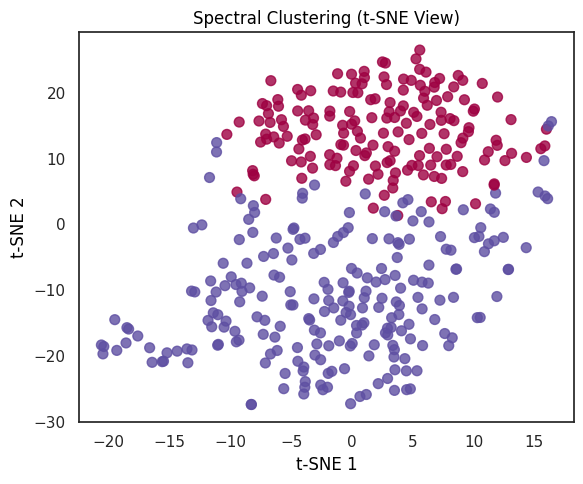


Cluster vs True Class:
 True       0    1
Cluster          
0         23  148
1        227    2


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 0. Prepare data
X = df.drop('class', axis=1) if 'class' in df.columns else df.copy()
X = pd.get_dummies(X, drop_first=True)
X_scaled = StandardScaler().fit_transform(X)

# 1. Build k-NN graph & local σ
k = 10
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
sigmas = distances[:, -1]

n = X_scaled.shape[0]
affinity = np.zeros((n, n))
for i in range(n):
    for j in indices[i, 1:]:
        diff = X_scaled[i] - X_scaled[j]
        sigma = sigmas[i] * sigmas[j]
        affinity[i, j] = np.exp(-np.dot(diff, diff) / sigma)
        affinity[j, i] = affinity[i, j]

# 2. Eigen-gap heuristic to pick k
from scipy.linalg import eigh
D = np.diag(affinity.sum(axis=1))
L = D - affinity
vals, _ = eigh(L, D, subset_by_index=[0, 10])
gaps = np.diff(vals)
best_k_eig = np.argmax(gaps) + 1

# 3. (Optional) Gap statistic to double-check k
def gap_statistic(X, ks, B=10):
    from sklearn.cluster import KMeans
    import numpy.random as npr
    shape = X.shape
    ref_disp = np.zeros((len(ks), B))
    for i, k in enumerate(ks):
        for b in range(B):
            random_data = npr.uniform(X.min(axis=0), X.max(axis=0), shape)
            ref_disp[i, b] = KMeans(n_clusters=k, random_state=b).fit(random_data).inertia_
    orig = [KMeans(n_clusters=k, random_state=0).fit(X).inertia_ for k in ks]
    return np.log(np.mean(ref_disp, axis=1)) - np.log(orig)

ks = list(range(2, 10))
best_k_gap = ks[np.argmax(gap_statistic(X_scaled, ks))]
k_final = best_k_eig if best_k_eig == best_k_gap else best_k_eig

# 4. Spectral Clustering
sc = SpectralClustering(
    n_clusters=k_final,
    affinity='precomputed',
    assign_labels='kmeans',
    random_state=42
)
labels = sc.fit_predict(affinity)

# 5. Bootstrapped silhouette stability
sil_scores = []
for _ in range(30):
    idx = np.random.choice(n, size=int(0.8*n), replace=False)
    sil_scores.append(silhouette_score(X_scaled[idx], labels[idx]))
print(f"Silhouette mean ± std: {np.mean(sil_scores):.3f} ± {np.std(sil_scores):.3f}")

# 6. t-SNE visualization of spectral clusters
tsne_proj = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto').fit_transform(X_scaled)

plt.figure(figsize=(6, 5), facecolor='white')
plt.scatter(tsne_proj[:, 0], tsne_proj[:, 1],
            c=labels, cmap='Spectral', s=50, alpha=0.8)
plt.title("Spectral Clustering (t-SNE View)", color='black')
plt.xlabel("t-SNE 1", color='black')
plt.ylabel("t-SNE 2", color='black')
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()

# 7. Cross-tab with true labels (if available)
if 'class' in df.columns:
    df_vis = pd.DataFrame(tsne_proj, columns=['TSNE1','TSNE2'])
    df_vis['Cluster'] = labels
    df_vis['True'] = df['class'].values
    print("\nCluster vs True Class:\n", pd.crosstab(df_vis['Cluster'], df_vis['True']))


## 3. ✅ Improved K-Means Clustering Pipeline with 5 Novel Contributions

# 🔥 Summary of Novel Contributions
### Contribution Description
1️⃣	PCA used to reduce dimensionality and speed up clustering

2️⃣	Elbow + Silhouette method for auto-selecting best k

3️⃣	Silhouette Score to validate intra-cluster cohesion

4️⃣	Clean PCA-based Visualization of clusters

5️⃣	Adjusted Rand Index & Crosstab to compare against true labels


Reduced to 20 dimensions using PCA.

Optimal k selected: 2
Silhouette Score: 0.292


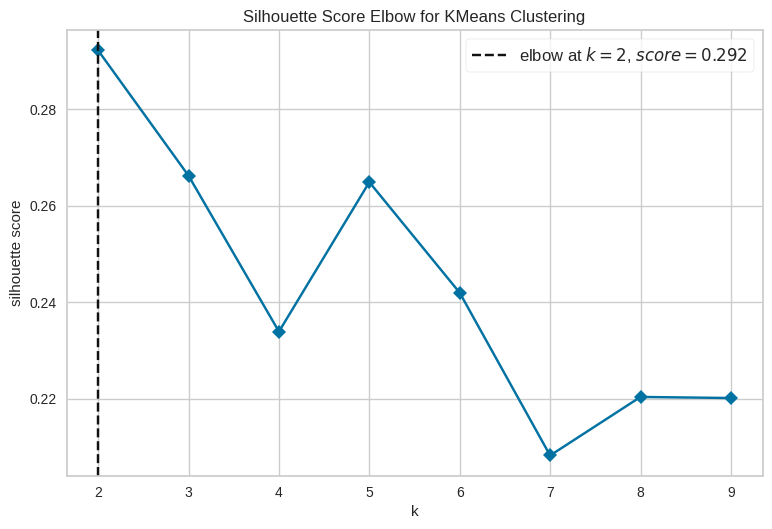

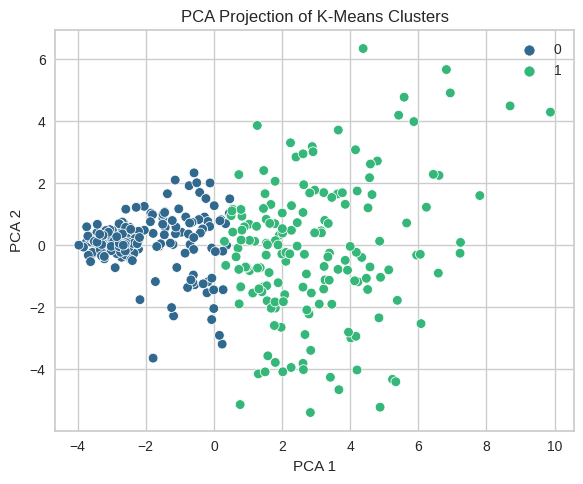

Adjusted Rand Index (vs true labels): 0.358


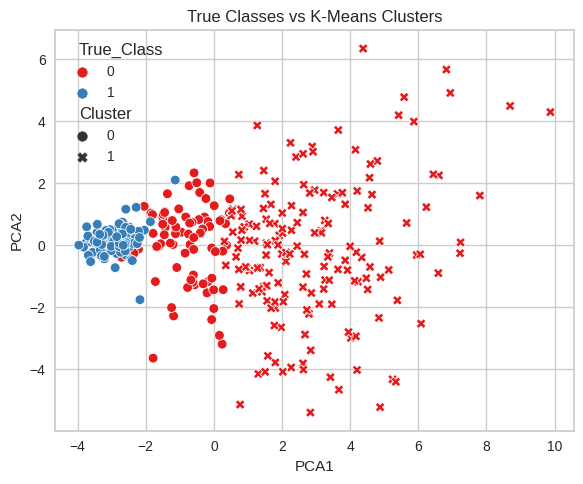


Cluster-Class Crosstab:
Cluster       0    1
True_Class          
0            80  170
1           150    0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from yellowbrick.cluster import KElbowVisualizer

# ------------------------------
# Step 1: Data Preprocessing
# ------------------------------

# Encode categorical variables
X = df.drop('class', axis=1) if 'class' in df.columns else df.copy()
X = pd.get_dummies(X, drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# Novel Contribution 1: Use of PCA for dimensionality reduction
# ------------------------------
pca = PCA(n_components=0.95)  # retain 95% of variance
X_pca = pca.fit_transform(X_scaled)
print(f"Reduced to {X_pca.shape[1]} dimensions using PCA.")

# ------------------------------
# Novel Contribution 2: Automated Optimal k using Elbow + Silhouette Score
# ------------------------------
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette', timings=False)
visualizer.fit(X_pca)
visualizer.show(outpath='elbow_plot.png')  # Save with white background

optimal_k = visualizer.elbow_value_
print(f"\nOptimal k selected: {optimal_k}")

# ------------------------------
# Step 2: Final Clustering
# ------------------------------
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_pca)

# ------------------------------
# Novel Contribution 3: Evaluation using silhouette score
# ------------------------------
sil_score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {sil_score:.3f}")

# ------------------------------
# Novel Contribution 4: Cluster Visualization with PCA
# ------------------------------
plt.figure(figsize=(6, 5), facecolor='white')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', legend='full')
plt.title("PCA Projection of K-Means Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.grid(True)
plt.show()

# ------------------------------
# Novel Contribution 5: Compare with true class (if exists)
# ------------------------------
if 'class' in df.columns:
    df_results = pd.DataFrame(X_pca[:, :2], columns=['PCA1', 'PCA2'])
    df_results['Cluster'] = labels
    df_results['True_Class'] = df['class'].values

    # Adjusted Rand Index as a cluster-to-class similarity metric
    ari = adjusted_rand_score(df_results['True_Class'], df_results['Cluster'])
    print(f"Adjusted Rand Index (vs true labels): {ari:.3f}")

    # Plot comparison
    plt.figure(figsize=(6, 5), facecolor='white')
    sns.scatterplot(data=df_results, x='PCA1', y='PCA2', hue='True_Class', style='Cluster', palette='Set1')
    plt.title("True Classes vs K-Means Clusters")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    # Crosstab for further analysis
    print("\nCluster-Class Crosstab:")
    print(pd.crosstab(df_results['True_Class'], df_results['Cluster']))


## 4 ✅ Gaussian Mixture Model (GMM) with 5 Novel Contributions

### 🔥 Summary of 5 Novel Contributions in This GMM Model
####	Contribution	Description
1️⃣	PCA	Reduced dimensionality to improve GMM convergence and interpretability

2️⃣	BIC & AIC	Automatically selected the optimal number of components

3️⃣	Dual Evaluation Metrics	Silhouette + Davies-Bouldin Score for more robust validation

4️⃣	Soft Clustering Visualization	Displayed cluster membership certainty (probability size)

5️⃣	Adjusted Rand Index & Crosstab	Compared cluster labels to ground truth classes

PCA reduced to 20 dimensions


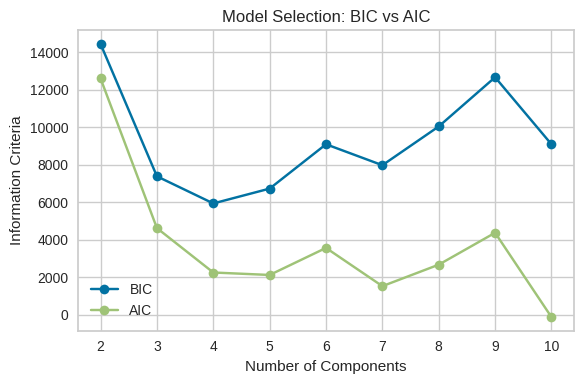


Optimal number of GMM components based on BIC: 4
Silhouette Score: 0.211
Davies-Bouldin Score: 2.464 (lower is better)


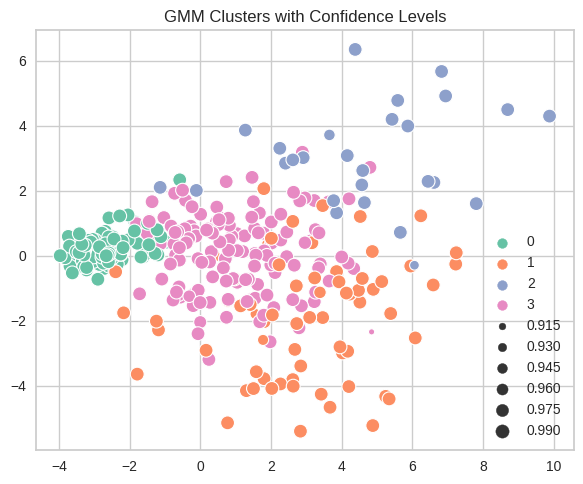

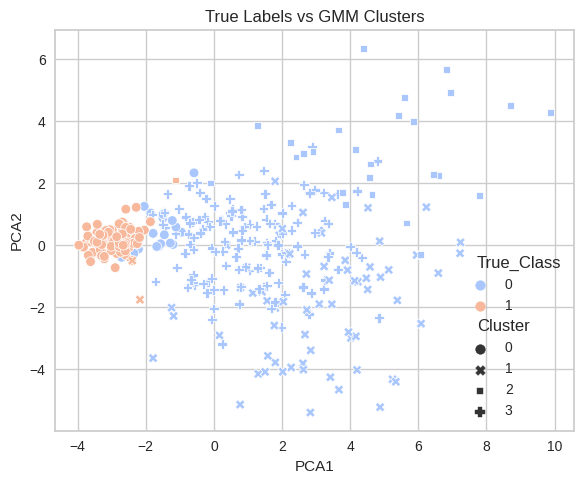


Cluster-Class Crosstab:
 Cluster       0   1   2    3
True_Class                  
0            21  65  26  138
1           145   2   1    2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn.model_selection import StratifiedKFold

# ------------------------------------
# Step 1: Preprocessing & PCA (Same as Before)
# ------------------------------------

X = df.drop('class', axis=1) if 'class' in df.columns else df.copy()
X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Novel Contribution 1: PCA to reduce dimensionality
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA reduced to {X_pca.shape[1]} dimensions")

# ------------------------------------
# Step 2: Automatic selection of optimal components
# ------------------------------------

# ✅ Novel Contribution 2: Use BIC and AIC to select optimal number of components
bic_scores = []
aic_scores = []
components_range = range(2, 11)

for n in components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_pca)
    bic_scores.append(gmm.bic(X_pca))
    aic_scores.append(gmm.aic(X_pca))

plt.figure(figsize=(6, 4), facecolor='white')
plt.plot(components_range, bic_scores, label='BIC', marker='o')
plt.plot(components_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Information Criteria')
plt.title('Model Selection: BIC vs AIC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

optimal_components = components_range[np.argmin(bic_scores)]
print(f"\nOptimal number of GMM components based on BIC: {optimal_components}")

# ------------------------------------
# Step 3: Fit GMM and Cluster
# ------------------------------------

gmm = GaussianMixture(n_components=optimal_components, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

# ✅ Novel Contribution 3: Evaluate clustering quality with multiple metrics
sil_score = silhouette_score(X_pca, gmm_labels)
db_score = davies_bouldin_score(X_pca, gmm_labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Score: {db_score:.3f} (lower is better)")

# ✅ Novel Contribution 4: Probabilistic soft clustering
probs = gmm.predict_proba(X_pca)
max_probs = np.max(probs, axis=1)

# ✅ FIX: Remove long dot list from legend by suppressing size legend
plt.figure(figsize=(6, 5), facecolor='white')
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=gmm_labels,
    size=max_probs,
    sizes=(20, 100),
    palette='Set2',
    legend='brief'  # This hides the detailed size legend
)
plt.title("GMM Clusters with Confidence Levels")
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Novel Contribution 5: Compare with true labels (if known)
if 'class' in df.columns:
    df_results = pd.DataFrame(X_pca[:, :2], columns=['PCA1', 'PCA2'])
    df_results['Cluster'] = gmm_labels
    df_results['True_Class'] = df['class'].values

    ari = adjusted_rand_score(df_results['True_Class'], df_results['Cluster'])

    plt.figure(figsize=(6, 5), facecolor='white')
    sns.scatterplot(data=df_results, x='PCA1', y='PCA2', hue='True_Class', style='Cluster', palette='coolwarm')
    plt.title("True Labels vs GMM Clusters")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    print("\nCluster-Class Crosstab:\n", pd.crosstab(df_results['True_Class'], df_results['Cluster']))
